In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
 
# select the dataframe of interest
uploaded = files.upload()

Saving dataset_1.csv to dataset_1.csv
Saving dataset_2.csv to dataset_2.csv


# Filter methods

Los métodos de filtros son procedimientos para seleccionar features basados en la información del feature, estos métodos son los que principalmente aplicaremos al principio en todos los proyectos de ML.
Nos ayudarán a reducir el feature-space y obtener nuevos features.

## Basic methods

Los métodos básicos consisten en remover los features que presenten las sig. propiedades:

* features constantes.
* features casi-constantes.
* features duplicados.

### Constant features

Los features constantes son los que muestran un mismo valor en todas las observaciones. Por lo que dicha información resulta irrelevante.

Podemos buscar estos constant features de dos formas:
* Analíticamente: viendo cuál es la media, los cuartiles y la desviación estándar de cada columna y con esta información podremos determinar que columnas poseen valores constantes.

* Gráficamente: Podemos plotear los distintos valores para cada columna y ver cuáles son sus gráficos, si se tratan de constantes estaremos al frente de una columna constante...

**Analíticamente:**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("dataset_1.csv")

In [ ]:
df.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.00000,...,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,0.002220,0.000060,15.593002,3.149633,608.681764,4.000000e+03,0.000300,0.035040,0.000240,0.00018,...,0.085164,0.009900,0.0,0.127260,0.086880,0.0,0.003060,12.462960,5.683960e+03,0.039820
std,0.108145,0.007746,1280.571855,2.740114,10951.361737,6.324492e+05,0.029999,0.322884,0.026832,0.03000,...,1.148319,0.214016,0.0,0.607019,0.622398,0.0,0.078808,832.417622,4.736482e+04,0.195538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,2.850000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
75%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
max,9.000000,1.000000,207901.336500,35.280000,445500.000000,1.000000e+08,3.000000,6.000000,3.000000,6.00000,...,74.520000,12.000000,0.0,6.000000,33.000000,0.0,3.000000,134666.681100,2.857673e+06,1.000000


**OBS IMPORTANTE:** En todos los procedimientos de selección de features, es una buena práctica seleccionar los features examinando solo el conjunto de entrenamiento. Esto es para evitar el over-fiting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train_describe = X_train.describe()

In [ ]:
# mis columnas constantes candidatas las obtendre verificando que la std sea 0 y que la media sea igual al maximo (deberia ser igual al minimo y a los percentiles tmb)
# loc me sirve para indexar a las filas por indice
const_col_candidates = [col for col in X_train_describe.columns 
                        if ((X_train_describe[[col]].loc["mean"][0] == X_train_describe[[col]].loc["max"][0]) 
                            & (X_train_describe[[col]].loc["std"][0]==0))]

In [ ]:
len(const_col_candidates)

34

**Usando la función nunique de pandas**

**OBS:** 
* nunique devuelve el número de valores únicos de una particular columna.
* unique devuelve un listado de los valores únicos de una particular columna.
* => df[col].nunique == len(df[col].unique)

In [ ]:
const_col_candidates = [col for col in X_train.columns if X_train[col].nunique() == 1]

In [ ]:
len(const_col_candidates)

34

In [ ]:
# eliminamos los features constantes
X_train = X_train.drop(const_col_candidates, axis=1)
X_test = X_test.drop(const_col_candidates, axis=1)

### Quasi-constant features

Los features casi-constantes son los que muestran un mismo valor en el 95/99% de las observaciones.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("dataset_1.csv")

**OBS IMPORTANTE:** En todos los procedimientos de selección de features, es una buena práctica seleccionar los features examinando solo el conjunto de entrenamiento. Esto es para evitar el over-fiting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

Dropeamos los valores constantes

In [ ]:
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [ ]:
const_feat = [col for col in X_train.columns if X_train[col].nunique() == 1]

X_train.drop(const_feat, axis=1,inplace=True)
X_test.drop(const_feat, axis=1,inplace=True)


In [ ]:
X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [ ]:
X_train["var_1"].value_counts()

0    34987
3        7
6        5
9        1
Name: var_1, dtype: int64

In [ ]:
# con el parametro normalize=True podemos calcular la frecuencia de los valores unicos
X_train["var_1"].value_counts(normalize=True)

0    0.999629
3    0.000200
6    0.000143
9    0.000029
Name: var_1, dtype: float64

In [ ]:
def qsy_const_feat(df):
  
  quasi_const_feat = []

  for feature in df.columns:

    # calculamos la frecuencia de los valores unicos y luego ordenamos de forma descendente
    predominant = df[feature].value_counts(normalize=True).sort_values(ascending=False).values[0]

    # si dicho valor se repite en la mayoria de las filas de dicha columna => 
    # puede que dicha columna sea candidata a ser un quasi const feature
    if predominant > 0.998:
      quasi_const_feat.append(feature)

  return quasi_const_feat

In [ ]:
X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [ ]:
qsy_const_features = qsy_const_feat(X_train)

len(qsy_const_features)

# eliminamos los features casi constantes
X_test.drop(qsy_const_features, axis=1, inplace=True)
X_train.drop(qsy_const_features, axis=1, inplace=True)

In [ ]:
X_train.shape, X_test.shape

((35000, 158), (15000, 158))

### Duplicated features

Es trivial.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("dataset_1.csv")

In [ ]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


**OBS IMPORTANTE:** En todos los procedimientos de selección de features, es una buena práctica seleccionar los features examinando solo el conjunto de entrenamiento. Esto es para evitar el over-fiting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

Pasamos a remover features constantes y casi constantes

In [ ]:
const_feat = [col for col in X_train.columns if (X_train[col].nunique() == 1)]

# dropeamos features constantes
X_train.drop(const_feat, axis=1, inplace=True)
X_test.drop(const_feat, axis=1, inplace=True)

qsy_const_feat = qsy_const_feat(X_train)

# dropeamos features casi constantes
X_train.drop(qsy_const_feat, axis=1, inplace=True)
X_test.drop(qsy_const_feat, axis=1, inplace=True)

In [ ]:
X_train.shape, X_test.shape

((35000, 158), (15000, 158))

Definimos una función  para encontrar features duplicados

In [ ]:
def duplicated_feat(df):

  duplicated_feat_pairs = {}

  duplicated_feat = []

  for i in range(len(df.columns)):
    
    # agarro el primer feature
    actual_feature = df.columns[i]

    if actual_feature not in duplicated_feat:

      # actualizo el diccionario para dicho feature indicando que todavia no tiene duplicados
      duplicated_feat_pairs[actual_feature] = []

      # recorro los demas features
      for feat_2 in df.columns[i+1:]:

        # checkeo columna a columna con el fueature actual para saber si son duplicados
        if df[actual_feature].equals(df[feat_2]):

          # actualizo el diccionario en el feature correspondiente indicando cual es su duplicado
          duplicated_feat_pairs[actual_feature].append(feat_2)

          # actualizo la lista de features duplicados
          duplicated_feat.append(feat_2)

  return (duplicated_feat, duplicated_feat_pairs)

Encontramos un total de 6 features duplicados

In [ ]:
duplicated_features = duplicated_feat(X_train)

len(duplicated_features[0])

6

In [ ]:
# iterar en el diccionario de duplicados:
for feat in duplicated_features[1].keys():
    
    # si tiene duplicado entonces tiene mas de un elemento
    if len(duplicated_features[1][feat]) > 0:

        print(feat, duplicated_features[1][feat])
        print()

var_37 ['var_148']

var_84 ['var_199']

var_143 ['var_296']

var_177 ['var_250']

var_226 ['var_232']

var_229 ['var_269']



Procedemos a eliminar  los features duplicados

In [ ]:
X_train.shape, X_test.shape

((35000, 158), (15000, 158))

In [ ]:
X_train.drop(duplicated_features[0], axis=1, inplace=True)
X_test.drop(duplicated_features[0], axis=1, inplace=True)

In [ ]:
X_train.shape, X_test.shape

((35000, 152), (15000, 152))

### Tratar constant features, quasi-constant features y duplicated features con Feature-engine library

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 4.1 MB/s 


#### Constant features y Quasi-constant features

In [ ]:
from feature_engine.selection import DropConstantFeatures

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("dataset_1.csv")

In [ ]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


**OBS IMPORTANTE:** En todos los procedimientos de selección de features, es una buena práctica seleccionar los features examinando solo el conjunto de entrenamiento. Esto es para evitar el over-fiting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

DropConstantFeatures elimina features constantes y casi constantes de un conjunto de datos. Podemos eliminar features constantes configurando el parámetro tol en 1, o cuasi-constante con valores más pequeños para dicho parámetro.

In [ ]:
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [ ]:
# constant Features
rcf = DropConstantFeatures(tol=1, variables=None, missing_values='raise')

rcf.fit(X_train)

# obtenemos el listado de los constant features
constant_features = rcf.features_to_drop_

# dropeamos las columnas
X_train = rcf.transform(X_train)
X_test = rcf.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [ ]:
# quasi-constant Features
rqcf = DropConstantFeatures(tol=0.998, variables=None, missing_values='raise')

rqcf.fit(X_train)

X_train = rqcf.transform(X_train)
X_test = rqcf.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((35000, 158), (15000, 158))

#### Duplicated features

In [ ]:
from feature_engine.selection import DropDuplicateFeatures

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("dataset_1.csv")

**OBS IMPORTANTE:** En todos los procedimientos de selección de features, es una buena práctica seleccionar los features examinando solo el conjunto de entrenamiento. Esto es para evitar el over-fiting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

Dropeamos features constantes y casi constantes

In [ ]:
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [ ]:
rqcf = DropConstantFeatures(tol=0.998, variables=None, missing_values='raise')

rqcf.fit(X_train)

X_train = rqcf.transform(X_train)
X_test = rqcf.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((35000, 158), (15000, 158))

In [ ]:
# seteamos el selector
rdf = DropDuplicateFeatures(variables=None, missing_values='raise')

rdf.fit(X_train)

rdf.features_to_drop_

{'var_148', 'var_199', 'var_232', 'var_250', 'var_269', 'var_296'}

Dropeamos los features duplicados

In [ ]:
X_train.shape , X_test.shape

((35000, 158), (15000, 158))

In [ ]:
X_train = rdf.transform(X_train)
X_test =rdf.transform(X_test)

In [ ]:
X_train.shape , X_test.shape

((35000, 152), (15000, 152))

## Correlation

La correlación es una medida de la relación LINEAL entre dos o más variables.

* Atrevés de la correlación podemos predecir una variable a partir de otra/s ("buenas" variables están altamente correlacionadas con el target)

* Las variables deberían estar correlacionadas con el target, pero no-correlacionadas entre ellas, pues si lo estuviesen estaríamos teniendo información redundante. Ejm: tenemos una variable "fecha-nacimiento" y otra "edad".

**Los óptimos conjuntos de features están altamente relacionados con el target y no relacionados entre ellos.**

En la práctica, la selección de features debe realizarse después del data cleaning (por lo que no trataremos con variables categoricas o nans, por lo menos en estos ejemplos).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("dataset_2.csv", nrows=50000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

**Correlation heatmap:**

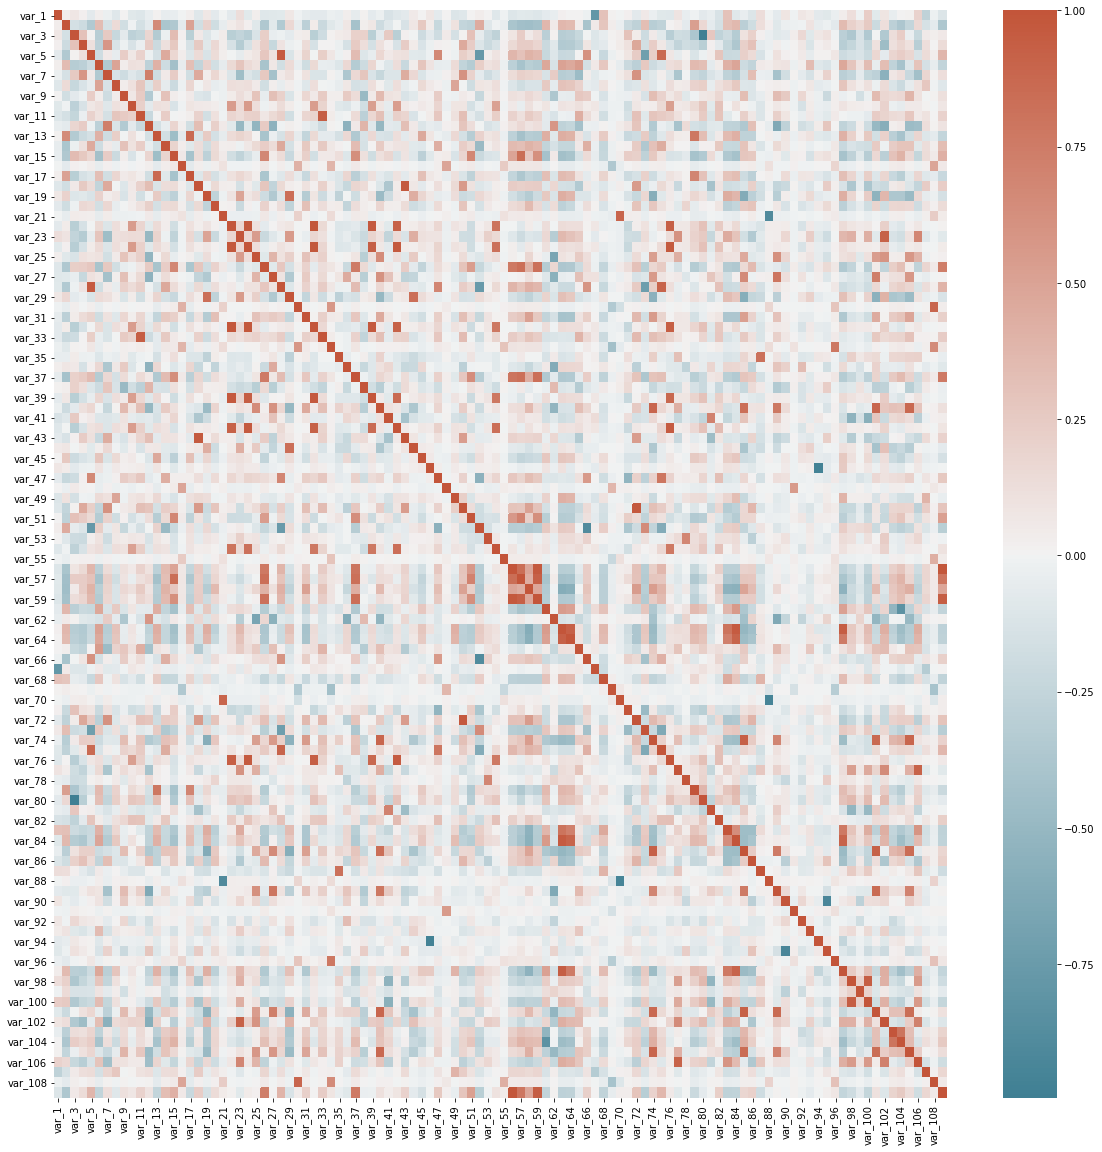

In [ ]:
corr = X_train.corr(method='pearson')

cmap = sns.diverging_palette(220, 20, as_cmap=True)

f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=False, cmap=cmap)

**Correlation scatterplots:**

In [ ]:
high_correlated = []

# recorro todas las variables y me fijo su correlacion con la variable_5
for var in corr["var_5"].index.tolist():

  # altamente correlacionada con la variable 5
  if corr["var_5"].loc[[var]][0] >0.8:
    high_correlated.append(var)

high_correlated

['var_5', 'var_28', 'var_75']

Podemos apreciar como features con alta correlación presentan un "gráfico lineal"

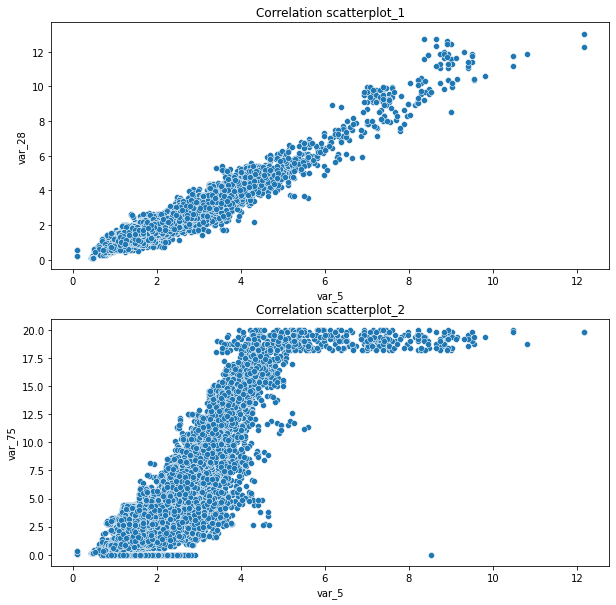

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(10,10))

axs[0].set_title("Correlation scatterplot_1")
axs[1].set_title("Correlation scatterplot_2")

sns.scatterplot(x=X_train['var_5'], y=X_train['var_28'], ax=axs[0])
sns.scatterplot(x=X_train['var_5'], y=X_train['var_75'], ax=axs[1])
plt.show()

### Method_1 (Removing correlated features)

Lo que plantea el metodo 1 es:
1. Seleccionamos un feature: "a".  
2. Calculamos las correlaciones de "a" con los demás features.
3. Si existen features correlacionados con "a" = los eliminamos, quedándonos con "a".
4. Repetimos _1) con otro feature.

**OBS:** Al eliminar un feature podríamos estar perdiendo poder de predicción del target.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("dataset_2.csv")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

In [ ]:
def method_1(df, limit):

  # guardaremos los nombres de las columnas correlacionadas
  col_corr = []

  corr = df.corr(method='pearson')

  for i in range(len(corr.index)):
    
    col_1 = corr[corr.columns[i]].index[i]

    # este limite nos asegura recorrer solo la matriz triangular inferior
    # ya que si considerariamos toda la matriz estariamos considerando valores ya comparados.
    for j in range(i):

      col_2 = corr[corr.columns[j]].index[j]
      corr_value = abs(corr[col_1].loc[[col_2]][0])

      if corr_value > limit:

        # no consideramos la correlacion de un feature consigo mismo
        if col_2 != col_1:

          # guardamos en nuesta variable de columnas de correlaciones una 3-upla
          # el valor de la correlacion y las columnas involucradas
          col_corr.append((corr_value, col_1, col_2))

  return col_corr

In [ ]:
corr_features = method_1(X_train, 0.8)
corr_features

[(0.8632980418993791, 'var_17', 'var_13'),
 (0.9813409653986921, 'var_24', 'var_22'),
 (0.9536721652384935, 'var_28', 'var_5'),
 (0.8341792843814466, 'var_29', 'var_19'),
 (0.990430734999363, 'var_32', 'var_22'),
 (0.9804113632495293, 'var_32', 'var_24'),
 (0.9443605986205844, 'var_33', 'var_11'),
 (0.9744609333741678, 'var_39', 'var_22'),
 (0.9431153866790611, 'var_39', 'var_24'),
 (0.9748779191363224, 'var_39', 'var_32'),
 (0.91910579117498, 'var_42', 'var_22'),
 (0.9672922649953389, 'var_42', 'var_24'),
 (0.9199183443060952, 'var_42', 'var_32'),
 (0.8567453370818933, 'var_42', 'var_39'),
 (0.9654741987814475, 'var_43', 'var_18'),
 (0.8358214281472581, 'var_44', 'var_29'),
 (0.8150241475398633, 'var_54', 'var_24'),
 (0.8287090109274785, 'var_54', 'var_42'),
 (0.837404481636077, 'var_57', 'var_15'),
 (0.8318090759398273, 'var_57', 'var_26'),
 (0.8207993837973238, 'var_57', 'var_37'),
 (0.8440857367712562, 'var_57', 'var_56'),
 (0.8131947525226287, 'var_59', 'var_26'),
 (0.830614427458

In [ ]:
len(corr_features)

66

Vemos que en la lista de 3-uplas, el segundo elemento se repite procedemos a eliminar los duplicados.

In [ ]:
# eliminamos los duplicados creando un conjunto
# puesto que los conjuntos en python no admiten duplicados
var_to_delete = {var[2] for var in corr_features}

=> Obtenemos 40 features altamente correlacionados con otros.

In [ ]:
len(var_to_delete)

40

Una vez detectado cuales son los features altamente correlacionados procedemos a dropearlos del DataFrame

In [ ]:
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [ ]:
X_train.drop(labels=var_to_delete, axis=1, inplace=True)
X_test.drop(labels=var_to_delete, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 68), (15000, 68))

**Method_1 with feature-engine**

Podemos realizar el mismo metodo con la libreria feature-engine, veamos si llegamos al mismo resultado ie a dropear 40 features.

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from feature_engine.selection import DropCorrelatedFeatures

In [ ]:
df = pd.read_csv("dataset_2.csv", nrows=50000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

In [ ]:
# seteamos el selector
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson',
    missing_values='ignore'
)

sel.fit(X_train)

DropCorrelatedFeatures()

In [ ]:
# grupos de features cuya corr es > 0.8
sel.correlated_feature_sets_

[{'var_3', 'var_80'},
 {'var_28', 'var_5', 'var_75'},
 {'var_11', 'var_33'},
 {'var_13', 'var_17'},
 {'var_15', 'var_57'},
 {'var_18', 'var_43'},
 {'var_19', 'var_29'},
 {'var_21', 'var_70', 'var_88'},
 {'var_22', 'var_24', 'var_32', 'var_39', 'var_42', 'var_76'},
 {'var_102', 'var_23'},
 {'var_26', 'var_59'},
 {'var_108', 'var_30'},
 {'var_35', 'var_87'},
 {'var_101', 'var_105', 'var_40', 'var_74', 'var_85'},
 {'var_46', 'var_94'},
 {'var_50', 'var_72'},
 {'var_52', 'var_66'},
 {'var_109', 'var_56'},
 {'var_104', 'var_60'},
 {'var_63', 'var_64', 'var_84', 'var_97'},
 {'var_106', 'var_77'},
 {'var_90', 'var_95'},
 {'var_100', 'var_98'}]

Podemos ver que usando el metodo_1 de la libreria feature-engine estaremos eliminando 6 features menos que al hacerlo "manual".

In [ ]:
# el metodo transform seleccionara 1 feature de cada grupo y
# procedera a remover el resto de features de dicho grupo.
len(sel.features_to_drop_)

34

In [ ]:
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [ ]:
# drop correlated features
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 74), (15000, 74))

### Method_2 (Removing correlated features)

Lo que plantea el método 2 es:


1. Identificamos grupos de features correlacionados entre sí.
2. Seleccionamos el feature con mayor poder de predicción bajo algún criterio.
  * Crear un modelo de ML que evalue los features de un mismo conjunto, quedándonos con el que posee mayor poder de predicción.
  * Número de valores nulos (nos quedamos con el feature con menor número de valores nulos).
3. Descartamos el resto de features.

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("dataset_2.csv", nrows=50000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

In [ ]:
corr = X_train.corr()

# calculamos los valores abs
corr = corr.abs().unstack()
corr = corr.sort_values(ascending=False)

corr = corr[corr >= 0.8]
corr = corr[corr < 1]
corr = pd.DataFrame(corr).reset_index()
corr.columns = ['feature1', 'feature2', 'corr']
corr.head()

,feature1,feature2,corr
0,var_80,var_3,0.994923
1,var_3,var_80,0.994923
2,var_32,var_22,0.990431
3,var_22,var_32,0.990431
4,var_56,var_109,0.987777


Procedemos a buscar los grupos de correlaciones

In [ ]:
def method_2(df):
  grouped_feature_ls = []

  # guardaremos los grupos de correlaciones
  corr_groups = []

  for feature in corr.feature1:

    # si el feature no fue contemplado previamente => pasamos a buscar su bloque de corr
    if feature not in grouped_feature_ls:

      corr_block = corr[corr["feature1"] == feature][["feature2", "corr"]].values
      grouped_feature_ls = grouped_feature_ls + [feature[0] for feature in corr_block] + [feature]

      corr_groups.append((feature ,[feature[0] for feature in corr_block ],[corr[1] for corr in corr_block ]))
  
  return corr_groups

In [ ]:
corr_groups = method_2(X_train)
corr_groups_df = pd.DataFrame(corr_groups, columns=["group_name_feature", "corr_features_group", "corr"])

In [ ]:
corr_groups_df

,group_name_feature,corr_features_group,corr
0,var_80,[var_3],[0.9949233674877688]
1,var_32,"[var_22, var_24, var_39, var_76, var_42]","[0.990430734999363, 0.9804113632495293, 0.9748..."
2,var_56,"[var_109, var_59, var_57]","[0.9877770388061411, 0.9757443944210573, 0.844..."
3,var_72,[var_50],[0.9702627369945973]
4,var_94,[var_46],[0.967894593929465]
5,var_43,[var_18],[0.9654741987814475]
6,var_63,"[var_84, var_97, var_64]","[0.959138004504806, 0.9401844891006294, 0.9244..."
7,var_28,"[var_5, var_75]","[0.9536721652384935, 0.9044132378219414]"
8,var_88,"[var_70, var_21]","[0.9489465365954278, 0.8943929785046758]"
9,var_11,[var_33],[0.9443605986205844]


In [ ]:
corr_groups_df[corr_groups_df["group_name_feature"]== "var_32"]

,group_name_feature,corr_features_group,corr
1,var_32,"[var_22, var_24, var_39, var_76, var_42]","[0.990430734999363, 0.9804113632495293, 0.9748..."


Ahora veremos como crear un modelo de ML que evalúe los features de un mismo conjunto, quedándonos con el que posee mayor poder de predicción.

* por ejm analicemos el grupo de la var_32.

In [ ]:
# agregamos var_32 puesto que no figura en el grupo
group_var_32 = corr_groups_df[corr_groups_df["group_name_feature"] == "var_32"]["corr_features_group"].values[0] + ["var_32"]
group_var_32

['var_22', 'var_24', 'var_39', 'var_76', 'var_42', 'var_32']

In [ ]:
# declaramos un modelo de RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[group_var_32].fillna(0), y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

Podemos apreciar que el feature con mayor importancia resulta ser el feature: var_39, por lo que procederíamos  a eliminar el resto.

In [ ]:
# obtenemos la importancia de cada feature del grupo
importance = pd.concat(
    [pd.Series(group_var_32),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# ordenamos
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,var_39,0.194210
3,var_76,0.187360
0,var_22,0.167467
1,var_24,0.167054
4,var_42,0.147102
5,var_32,0.136807


**Method_2 with feature-engine**

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from feature_engine.selection import SmartCorrelatedSelection

In [ ]:
df = pd.read_csv("dataset_2.csv", nrows=50000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

In [ ]:
# declaramos el modelo
rf = RandomForestClassifier(
    n_estimators=10,
    random_state=20,
    n_jobs=4,
)

# declaramos el selector
sel = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=rf,
    scoring="roc_auc",
    cv=3,
)

# pasamos a entgrenar un rf por grupo de corr
# por lo que puede demorar un tiempo

sel.fit(X_train, y_train)

SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                          n_jobs=4,
                                                          random_state=20),
                         missing_values='raise',
                         selection_method='model_performance')

In [ ]:
# obtenemos el grupo de los features corr

sel.correlated_feature_sets_

[{'var_3', 'var_80'},
 {'var_28', 'var_5', 'var_75'},
 {'var_11', 'var_33'},
 {'var_13', 'var_17'},
 {'var_15', 'var_57'},
 {'var_18', 'var_43'},
 {'var_19', 'var_29'},
 {'var_21', 'var_70', 'var_88'},
 {'var_22', 'var_24', 'var_32', 'var_39', 'var_42', 'var_76'},
 {'var_102', 'var_23'},
 {'var_26', 'var_59'},
 {'var_108', 'var_30'},
 {'var_35', 'var_87'},
 {'var_101', 'var_105', 'var_40', 'var_74', 'var_85'},
 {'var_46', 'var_94'},
 {'var_50', 'var_72'},
 {'var_52', 'var_66'},
 {'var_109', 'var_56'},
 {'var_104', 'var_60'},
 {'var_63', 'var_64', 'var_84', 'var_97'},
 {'var_106', 'var_77'},
 {'var_90', 'var_95'},
 {'var_100', 'var_98'}]

**OBS**: Podemos ver que efectivamente hay correlaciones entre features que el metodo de feature-engine no estaría encontrando por ejm la corr entre los features: "var_103" y "var_104"

In [ ]:
corr = X_train.corr()
corr = corr.abs().unstack()
corr = corr.sort_values(ascending=False)

corr = corr[corr >= 0.8]
corr = corr[corr < 1]
corr = pd.DataFrame(corr).reset_index()
corr.columns = ['feature1', 'feature2', 'corr']

In [ ]:
corr[corr["feature1"]=="var_103"]

,feature1,feature2,corr
131,var_103,var_104,0.804599


Ahora pasemos a examinar la performance de rf basado en los features del noveno grupo

In [ ]:
group = sel.correlated_feature_sets_[8]
group

{'var_22', 'var_24', 'var_32', 'var_39', 'var_42', 'var_76'}

=> El feature con mejor performance es var_76 por lo tanto es el que deberíamos  conservar.

In [ ]:
for f in group:
    
    model = cross_validate(
        rf,
        X_train[f].to_frame(),
        y_train,
        cv=3,
        return_estimator=False,
        scoring='roc_auc',
    )

    print(f, model["test_score"].mean())

var_24 0.4995271209227386
var_32 0.4932865386897871
var_76 0.504476568736881
var_39 0.4953910489136056
var_22 0.5027991993862401
var_42 0.4964444310729199


Podemos checkearlo haciendo:

In [ ]:
for feature in group:
  print(f"El feature: {feature} sera eliminado : {feature in sel.features_to_drop_}")

El feature: var_24 sera eliminado : True
El feature: var_32 sera eliminado : True
El feature: var_76 sera eliminado : False
El feature: var_39 sera eliminado : True
El feature: var_22 sera eliminado : True
El feature: var_42 sera eliminado : True


In [ ]:
# dropeamos
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 74), (15000, 74))

Cdo declaramos SmartCorrelatedSelection podemos seleccionar en selection_method distintos métodos de selección.

Por ejm podríamos querer seleccionar los features con más o menor varianza de cada grupo, o podríamos querer seleccionar por cardinalidad ie seleccionar los features con más valores únicos.

## Statistical measures

Estos métodos evalúan las características individualmente, se trata de métodos estadísticos.

### Mutual information

Información mutua es la medida de la dependencia mutua de 2 variables.
ie que el metodo estadistico mutual information cuantifica la cantidad de informacion ganada de una variable observando otra variable.

**Los valores de información mutua más altos indican poca incertidumbre sobre la variable Y dado X.**

No se limita a variables en números reales ni a relaciones lineales, por lo que la información mutua es más general que el coeficiente de consecuencias de Pearson.

In [ ]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile


In [ ]:
df = pd.read_csv("dataset_2.csv")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

**Determine Mutual Information**

Procedemos a calcular la mi entre los features y el target.

* A menor valor de mi => menos información podemos inferior del target a partir de los features.

In [ ]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.54873138e-03, 0.00000000e+00, 9.75386122e-04,
       2.49682570e-04, 5.39899613e-03, 4.92935787e-03, 3.20749966e-03,
       0.00000000e+00, 2.33452430e-04, 9.86401031e-04, 8.02071889e-04,
       8.16054208e-04, 5.13065790e-03, 0.00000000e+00, 1.50282268e-02,
       0.00000000e+00, 0.00000000e+00, 8.38981654e-05, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.45624471e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.46632282e-03, 1.51287470e-03, 0.00000000e+00, 0.00000000e+00,
       4.82214591e-03, 1.68946749e-02, 0.00000000e+00, 2.11699174e-03,
       8.66933244e-05, 1.84376251e-03, 6.05061439e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.08886783e-03,
       2.14456722e-03, 1.88606145e-03, 0.00000000e+00, 3.96746537e-03,
       0.00000000e+00, 3.48825499e-04, 0.00000000e+00, 2.72288663e-03,
       0.00000000e+00, 3.68467017e-03, 4.07341824e-02, 1.41486431e-03,
      

Podemos observar que tenemos variables con un valor MI alto (izq) y variables con un MI casi nulo (der).
Una vez que calculamos los valores de MI, para seleccionar los features necesitamos establecer un límite para poder seleccionar los features.

El límite se puede establecer de varias formas:

* Seleccionar los i primeros features.
* Seleccionar el n top de los percentiles.

Text(0, 0.5, 'Mutual Information')

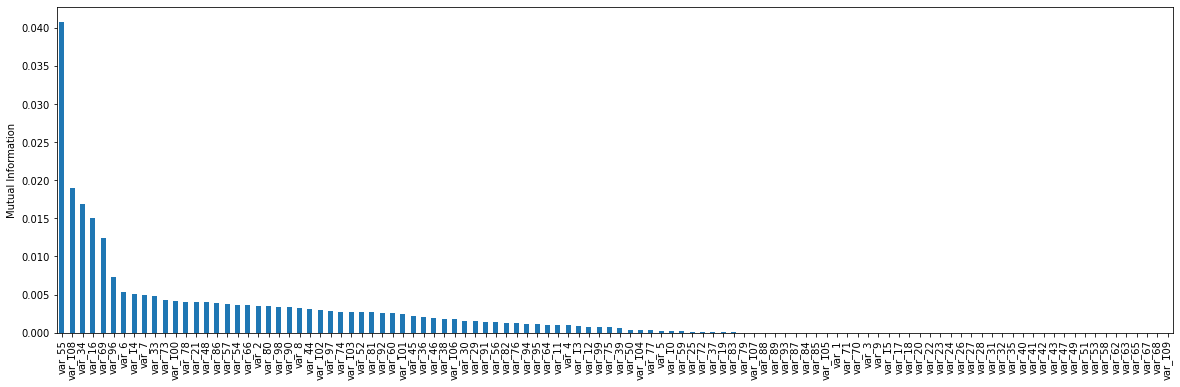

In [ ]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

**Select top k features based on MI**

In [ ]:
# seleccionamos los 10 primeros features con mayor valor MI
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_14', 'var_16', 'var_34', 'var_55', 'var_69',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [ ]:
# eliminamos el resto de los features
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

### ji-square test

Este test nos ayudará a evaluar variables **categóricas si el target tmb es categórico** (el target tmb podría tratarse de una variable discreta si es que no contase con muchos valores distintos).

La distribución ji cuadrado tiene dos usos principales:
* Prueba de bondad: Queremos ver si la muestra observada se corresponde con una distribución esperada.
* Checkear independencia de dos variables: La prueba de independencia, contrasta la hipótesis de que las variables son independientes, frente a la hipótesis alternativa de que una variable se distribuye de modo diferente para diversos niveles de la otra.

Para la selección de features nos servira más la aplicación de la ji cuadrado para checkear independencia de dos variables.

Como usamos la distribucion ji-cuadrado para seleccionar features? 
=> 
* 1) Creamos una tabla de contingencia entre la variable categorica y el target.
* 2) Encontramos la distribucion esperada (a partir de los datos observados).
* 3) Calculamos el estadistico ji-cuadrado.
* 4) Obtenemos el p-valor.
* 5) A partir del p-valor determinamos si dicha variable tiene poder predictivo hacia el target.

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

In [ ]:
vars = ["pclass", "survived", "sex", "sibsp", "parch", "embarked"]

In [ ]:
df = df[vars]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("survived", axis=1),
    df['survived'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((916, 5), (393, 5))

* 1) Calculamos la tabla de contingencia.

In [ ]:
# contingency table for gender
c = pd.crosstab(y_train, X_train['sex'])

c

sex,female,male
survived,,
0,91,472
1,244,109


* 2) Calculamos la distribucion esperada.
* 3) Calculamos el estadistico ji-cuadrado.
* 4) Calculamos el p-valor.

In [ ]:
chi2_contingency(c)

(260.0395486295738,
 1.682269173902727e-58,
 1,
 array([[205.90065502, 357.09934498],
        [129.09934498, 223.90065502]]))

Aplicamos los 4 pasos a todos los features categóricos.

In [ ]:
# To rank all features
chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Por último ploteamos el resultado del p-valor de acuerdo a cada variable categórica.

In [ ]:
len(X_train.columns) == len(chi_ls)

True

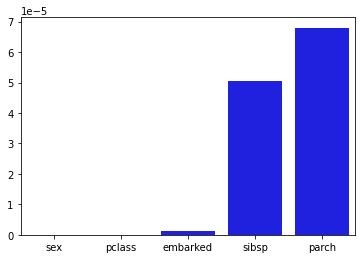

In [ ]:
# Creamos una serie para poder ordenar las variables segun el p-valor obtenido
sorted_series = pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True)

sns.barplot(x = sorted_series.index,y = sorted_series.values, color="b")

In [ ]:
sorted_series.index[:3]

Index(['sex', 'pclass', 'embarked'], dtype='object')

In [ ]:
# seleccionamos el top 3
selected = sorted_series.index[:3]
selected

Index(['sex', 'pclass', 'embarked'], dtype='object')

In [ ]:
X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()

,sex,pclass,embarked
501,female,2,S
588,female,2,S
402,female,2,C
1193,male,3,Q
686,female,3,Q


## Other Methods and metrics

### Unvariate model performance

La idea de este tipo de procedimientos es el sig:
* 1) Construimos un modelo de ML POR feature, para predecir el target.
* 2) Hacemos las predicciones utilizando nuestro modelo y el feature seleccionado.
* 3) Medimos la performance de nuestra predicción (podemos utilizar cualquier métrica p ejm: roc-auc o mse)
* 4) Rankeamos los features de acuerdo a la métrica.
* 5) Seleccionamos los top-features.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error

**Classification scenario**

In [ ]:
df = pd.read_csv('dataset_2.csv')
df.shape

(50000, 109)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

Determinamos el roc-auc para cada feature.

In [ ]:
roc_values = []

for feature in X_train.columns:

    # declaramos y entrenamos el modelo
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtenemos las predicciones
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculamos y guardamos el roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
roc_values[0:10]

[0.5069248231292061,
 0.5006908738145861,
 0.4931445654646017,
 0.5039101753068067,
 0.5014351366034588,
 0.5028347252717772,
 0.5095234564543892,
 0.5062626193645395,
 0.4913455716601861,
 0.5066196352647712]

Un roc-auc de 0.5 demuestra decisiones al azar, por lo que podríamos tomar los features que presentan un valor mayor al 0.5

Text(0, 0.5, 'roc-auc')

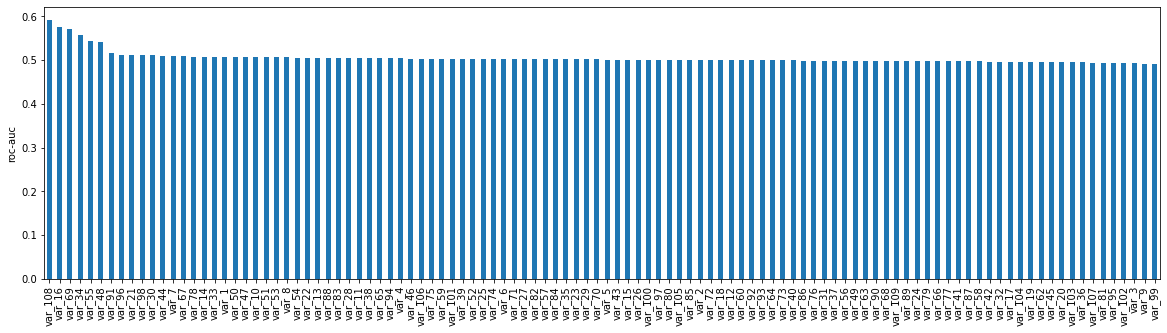

In [ ]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

Seleccionamos los features con un roc-auc > 0.5

In [ ]:
selected_features = roc_values[roc_values > 0.5].index

selected_features

Index(['var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18',
       'var_21', 'var_22', 'var_23', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_33', 'var_34', 'var_35', 'var_38', 'var_39',
       'var_43', 'var_44', 'var_46', 'var_47', 'var_48', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_54', 'var_55', 'var_57', 'var_59', 'var_65',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75',
       'var_78', 'var_80', 'var_82', 'var_83', 'var_84', 'var_85', 'var_88',
       'var_91', 'var_94', 'var_96', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_105', 'var_106', 'var_108'],
      dtype='object')

In [ ]:
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((35000, 67), (15000, 67))

**Regression scenario**

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# usamos solo variables numericas por simplicidad
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df.select_dtypes(include=numerics).columns)
df = df[numerical_vars]
df.shape

(1460, 38)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['SalePrice'], axis=1),
    df['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

Determinamos el mse para cada feature

In [ ]:
mse_values = []

for feature in X_train.columns:
    
    # declaramos el arbol de decision de regresion
    clf = DecisionTreeRegressor(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    
    # hacemos las predicciones
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    
    # determinamos el mse
    mse_values.append(mean_squared_error(y_test, y_scored))
    
mse_values[0:10]

[13268032828.324202,
 5258423546.061133,
 6827291221.813821,
 8379936849.301367,
 2097026635.6820993,
 6026309350.815287,
 4776574901.81357,
 5138584000.327346,
 7867108586.811187,
 7696158357.724333]

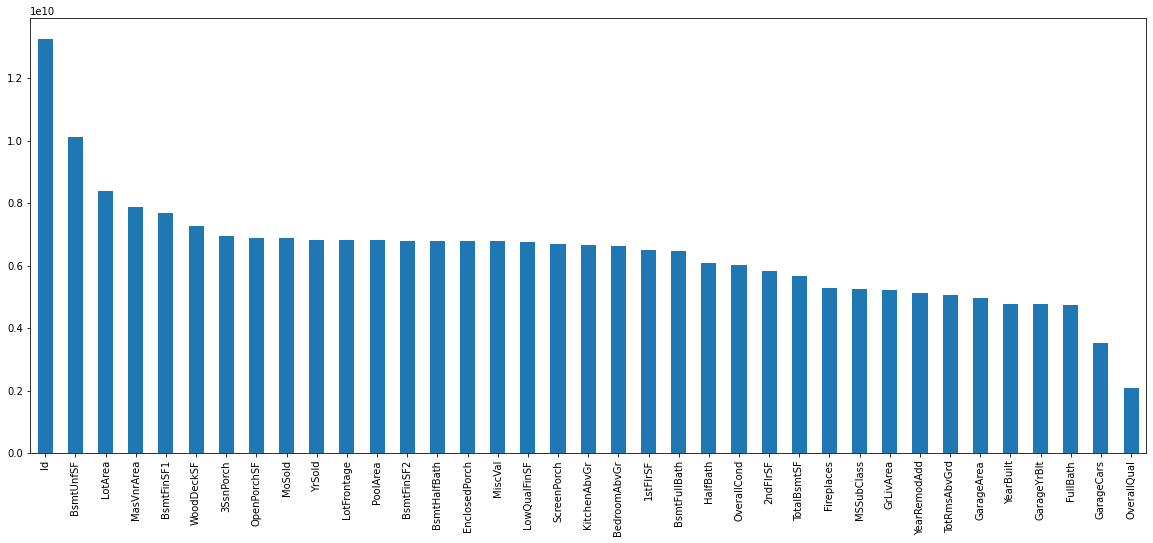

In [ ]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

Nos quedamos con los features que presenten un menor mse.

In [ ]:
selected_features = mse_values[mse_values < np.mean(mse_values)].index

selected_features

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((1022, 15), (438, 15))

### KDD 2009: Select features by target mean encoding

Para este metodo primero dividiremos nuestro dataframe en train_df y test_df.

En nuestro train_df determinaremos la media del target POR variable categorica.

En nuestro test_df reemplazaremos nuestras variables categorias por la media del target utilizando el encoding aprendido con el train_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [ ]:
# captures first letter of string (the letter of the cabin)
df['cabin'] = df['cabin'].str[0]
df['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', '?', 'T', 'F', 'G'], dtype=object)

**Aplicaremos el metodo a algunas variables categoricas.**

**OBS:** Cabe destacar que en nuestro x_train y x_test conservamos nuestro target ya que lo necesitaremos para hacer el encoding.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['pclass', 'sex', 'embarked', 'cabin', 'survived']],
    df['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 5), (393, 5))

In [ ]:
X_train.head()

,pclass,sex,embarked,cabin,survived
501,2,female,S,?,1
588,2,female,S,?,1
402,2,female,C,?,1
1193,3,male,Q,?,0
686,3,female,Q,?,1


Creamos la función que nos ayudara a codificar nuestras variables categóricas.

In [ ]:
def mean_encoding(df_train, df_test, categorical_vars):
    
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in categorical_vars:
        
        # creamos un diccionario agrupando por variable y 
        # calculando la media del target
        target_mean_dict = df_train.groupby([col])['survived'].mean().to_dict()
        
        # reemplazamos las variables categoricas por el valor de la media del target
        df_train_temp[col] = df_train[col].map(target_mean_dict)
        df_test_temp[col] = df_test[col].map(target_mean_dict)
    
    # dropeamos el target de nuestro train_set y test_set
    df_train_temp.drop(['survived'], axis=1, inplace=True)
    df_test_temp.drop(['survived'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp

In [ ]:
categorical_vars = ['pclass', 'sex', 'embarked', 'cabin']

X_train_enc, X_test_enc = mean_encoding(X_train, X_test, categorical_vars)

X_train_enc.head()

,pclass,sex,embarked,cabin
501,0.436170,0.728358,0.338957,0.304843
588,0.436170,0.728358,0.338957,0.304843
402,0.436170,0.728358,0.553073,0.304843
1193,0.259036,0.187608,0.373494,0.304843
686,0.259036,0.728358,0.373494,0.304843


In [ ]:
X_test_enc.head()

,pclass,sex,embarked,cabin
1139,0.259036,0.187608,0.338957,0.304843
533,0.436170,0.728358,0.338957,0.304843
459,0.436170,0.187608,0.338957,0.304843
1150,0.259036,0.187608,0.338957,0.304843
393,0.436170,0.187608,0.338957,0.304843


Determinamos el valor de roc-auc para las variables.



In [ ]:
roc_values = []

for feature in categorical_vars:
    
    roc_values.append(roc_auc_score(y_test, X_test_enc[feature]))

Podemos ver que todos los features presentan un valor de roc-auc mayor a 0.5 por lo que a priori parecen ser todos importantes para predecir el target.

In [ ]:
m1 = pd.Series(roc_values)
m1.index = categorical_vars
m1.sort_values(ascending=False)

sex         0.749959
pclass      0.670096
cabin       0.628809
embarked    0.593358
dtype: float64

**Ahora aplicaremos el método a algunas variables numéricas.**

Lo único distinto es reemplazar nuestras variables numéricas por contenedores.

In [ ]:
# puesto que nuestros datos son de tipo string numerico ie "10" o "20"
# los convertiremos a numericos
age_series = df["age"]
fare_series = df["fare"]

# reemplazamos los "?" por 0
df["age"] = age_series.map(lambda x: 0 if x == "?" else x)
df["fare"] = fare_series.map(lambda x: 0 if x == "?" else x)

# convertimos nuestras variables a numericas
age_series = pd.to_numeric(age_series)
fare_series = pd.to_numeric(fare_series)

df["age"] = age_series
df["fare"] = fare_series

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare', 'survived']],
    df['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

Vamos a crear intervalos que contienen la misma cantidad de observaciones.

In [ ]:
# queremos crear 5 intervalos a partir de la variable "age"
X_train['age_binned'], intervals = pd.qcut(
    X_train['age'],
    q = 5,
    labels=False,
    retbins=True,
    precision=3,
    duplicates='drop',
)

X_train[['age_binned', 'age']].head()

,age_binned,age
501,1,13.0
588,1,4.0
402,3,30.0
1193,0,0.0
686,1,22.0


In [ ]:
# ahora usamos los limites de los intervalos previamente calculados
X_test['age_binned'] = pd.cut(x = X_test['age'], bins=intervals, labels=False)

X_test[['age_binned', 'age']].head()

,age_binned,age
1139,3.0,38.0
533,1.0,21.0
459,4.0,42.0
1150,NaN,0.0
393,2.0,25.0


In [ ]:
# hacemos lo mismo para la variable fare
X_train['fare_binned'], intervals = pd.qcut(
    X_train['fare'],
    q=5,
    labels=False,
    retbins=True,
    precision=3,
    duplicates='drop',
)

X_test['fare_binned'] = pd.cut(x = X_test['fare'], bins=intervals, labels=False)

In [ ]:
X_test.isnull().sum()

age             0
fare            0
survived        0
age_binned     90
fare_binned     4
dtype: int64

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Usamos nuestra función previamente definida para encodear las variables.

In [ ]:
binned_vars = ['age_binned', 'fare_binned']

X_train_enc, X_test_enc = mean_encoding(
    X_train[binned_vars+['survived']], X_test[binned_vars+['survived']], binned_vars)

X_train_enc.head()

,age_binned,fare_binned
501,0.394231,0.371585
588,0.394231,0.434066
402,0.440415,0.371585
1193,0.290323,0.293478
686,0.394231,0.293478


Y por ultimo calculamos los valores roc-auc.

In [ ]:
roc_values = []

for feature in binned_vars:
    
    roc_values.append(roc_auc_score(y_test, X_test_enc[feature])) 

In [ ]:
m1 = pd.Series(roc_values)
m1.index = binned_vars
m1.sort_values(ascending=False)

fare_binned    0.704496
age_binned     0.500442
dtype: float64

### Unvariate model && Target mean encoding method with feature-engine

**Unvariate model:**

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

In [ ]:
df = pd.read_csv('dataset_2.csv')
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [ ]:
# declaramos nuestro modelo de ML
rf = RandomForestClassifier(
    n_estimators=10, random_state=1, n_jobs=4)

# seteamos el selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="roc_auc",
    cv=3,
    threshold=0.5,
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_estimators=10,
                                                                  n_jobs=4,
                                                                  random_state=1),
                                 threshold=0.5)

El selector guarda un diccionario de {feature: metric} en este caso la métrica  elegida es roc-auc.

In [ ]:
sel.feature_performance_

{'var_1': 0.4875938834188305,
 'var_2': 0.5058483405278383,
 'var_3': 0.49058058657865716,
 'var_4': 0.5012805934684074,
 'var_5': 0.5015491345272,
 'var_6': 0.5002435207544554,
 'var_7': 0.5053983517611355,
 'var_8': 0.5087118335520864,
 'var_9': 0.4986491009349452,
 'var_10': 0.5039430822845475,
 'var_11': 0.5045137356867333,
 'var_12': 0.5033237155159064,
 'var_13': 0.5012484355911511,
 'var_14': 0.5095484859036,
 'var_15': 0.5066966650073083,
 'var_16': 0.5770565890399896,
 'var_17': 0.4963279782124716,
 'var_18': 0.502378067648706,
 'var_19': 0.5014540898770624,
 'var_20': 0.49518900701995694,
 'var_21': 0.5018214387922665,
 'var_22': 0.5030784425065514,
 'var_23': 0.5031343862299139,
 'var_24': 0.4987183238443074,
 'var_25': 0.49717676403172434,
 'var_26': 0.49633575915302125,
 'var_27': 0.4976970194658073,
 'var_28': 0.506624930105751,
 'var_29': 0.503310578051897,
 'var_30': 0.5063009115535363,
 'var_31': 0.4980767700910498,
 'var_32': 0.4956905017784372,
 'var_33': 0.509659318

Nuevamente llamando al método del selector "features_to_drop" podemos ver los features a eliminar (puesto que ya en la declaración del selector indicamos el límite permitido).

In [ ]:
len(sel.features_to_drop_)

36

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

**Target mean encoding:**

In [ ]:
from feature_engine.selection import SelectByTargetMeanPerformance

In [ ]:
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

In [ ]:
df = df[["pclass", "survived", "sex", "age", "sibsp","parch","fare","cabin","embarked"]]

In [ ]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.55,C22 C26,S
2,1,0,female,2,1,2,151.55,C22 C26,S
3,1,0,male,30,1,2,151.55,C22 C26,S
4,1,0,female,25,1,2,151.55,C22 C26,S


In [ ]:
df['cabin'] = df['cabin'].str[0]

df['cabin'] = np.where(df['cabin'].isin(['T', 'G', "?"]), 'N', df['cabin'])

df['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', 'N', 'F'], dtype=object)

In [ ]:
df['cabin'].value_counts()

N    1020
C      94
B      65
D      46
E      41
A      22
F      21
Name: cabin, dtype: int64

In [ ]:
df = df.drop( df[(df["age"] == "?") | (df["fare"] == "?") | (df["embarked"] == "?")].index, axis=0)

In [ ]:
# number of passengers per value
df['parch'].value_counts()

0    765
1    160
2     97
3      8
5      6
4      5
6      2
Name: parch, dtype: int64

In [ ]:
# reemplazamos las ocurrencias del valor 4,5 y 6 por 3
df['parch'] = np.where(df['parch']>3,3,df['parch'])

In [ ]:
df['sibsp'].value_counts()

0    682
1    280
2     36
4     22
3     16
5      6
8      1
Name: sibsp, dtype: int64

In [ ]:
# reemplazamos las ocurrencias de los valores 4, 5 y 8 por 3
df['sibsp'] = np.where(df['sibsp']>3,3,df['sibsp'])

In [ ]:
# casteamos las variables discretas a variables categoricas 
df[['pclass','sibsp','parch']] = df[['pclass','sibsp','parch']].astype(np.object_)

In [ ]:
# como son variables tipo object las convierto a float
df[['age','fare']] = df[['age','fare']].astype(np.float64)

In [ ]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['survived'], axis=1),
    df['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((730, 8), (313, 8))

In [ ]:
# feautre engine automates the selection for both
# categorical and numerical variables

sel = SelectByTargetMeanPerformance(
    variables=None, # automatically finds categorical and numerical variables
    scoring="roc_auc", # the metric to evaluate performance
    threshold=0.6, # the threshold for feature selection, 
    bins=3, # the number of intervals to discretise the numerical variables
    strategy="equal_frequency", # whether the intervals should be of equal size or equal number of observations
    cv=2,# cross validation
    regression=False, # whether this is regression or classification
)

sel.fit(X_train, y_train)

SelectByTargetMeanPerformance(bins=3, cv=2, strategy='equal_frequency',
                              threshold=0.6)

In [ ]:
sel.feature_performance_

{'pclass': 0.672873166790952,
 'sex': 0.7589485458612975,
 'age': 0.5203517275664926,
 'sibsp': 0.5590743847874721,
 'parch': 0.5754645165299528,
 'fare': 0.6585259756400695,
 'cabin': 0.6502143922445937,
 'embarked': 0.6137055679840915}

# Wrapper methods

Los métodos wrapper son conocidos como algoritmos de búsqueda tipo Greedy ie que este tipo de métodos buscan la mejor combinación posible de **todos** los features con el obj de obtener la mejor performance en nuestro modelo de ML.

* Tienen la ventaja de obtener el grupo de features que mejor ajustan al modelo.
* Por otro lado tienen la desventaja de ser computacionalmente costosos.

**OBS:** si se decide cambiar el modelo de ML, el conjunto de features que eran óptimos para UN modelo en particular dejaran de serlo para un modelo distinto.

## Step Forward Feature Selection

* 1) Evalúa todos los subconjuntos de 1 feature.
* 2) Elige el feature que mejor performance da al modelo de ML.
* 3) Evalúa todos los subconjuntos de 2 features (anclando al que previamente eligió).
* 4) Elige el feature que mejor performance da al modelo de ML.

Dicho procedimiento se repite hasta que la performance del modelo deje de ser la óptima o hasta que dicha performance no muestre una mejoría significante.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [4]:
df = pd.read_csv('dataset_2.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

Ya que los métodos wrapper toman un tiempo considerable, vamos a reducir el feature-space removiendo los features altamente correlacionados.

In [6]:
# metodo 1 (fuerza bruta)
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  40


In [7]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 68), (15000, 68))

In [ ]:
sfs = SFS(
  estimator=RandomForestClassifier(
    n_estimators=10, n_jobs=4, random_state=0),
    n_features_to_select=10,  # the number of features to retain
    direction='forward',  # the direction of the selection procedure
    scoring='roc_auc',  # the metric to evaluate
    cv=2,  # the cross-validation fold
    n_jobs=4,  # for parallelization
  )

sfs = sfs.fit(X_train, y_train)

Obtenemos el subconjunto de features que proporciona el método fordware.

In [ ]:
selected_feat = sfs.get_feature_names_out()

selected_feat

array(['var_16', 'var_44', 'var_45', 'var_55', 'var_67', 'var_69',
       'var_73', 'var_88', 'var_91', 'var_108'], dtype=object)

Comparemos la performance del subconjunto de features.

In [ ]:
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.71220986912995
Test set
Random Forests roc-auc: 0.7032738123910467


## Step Backward Feature Selection

* 1) Evaluamos 1 conjunto con todos los n features.
* 2) Evaluamos los todos los subconjuntos posibles de n-1 features.
* 3) Elegimos el subconjunto de n-1 features que mejor performance da al modelo de ML.
* 4) Repetimos 2 pero con n-2 features.

Dicho procedimiento se repite hasta que la performance del modelo deje de ser la óptima o hasta que dicha performance no muestre una mejoría significante.

**OBS:** cdo eliminamos 1 feature este NO se vuelve a contemplar.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
df = pd.read_csv('dataset_2.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

Ya que los métodos wrapper toman un tiempo considerable, vamos a reducir el feature-space removiendo los features altamente correlacionados.

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  40


In [ ]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 68), (15000, 68))

In [ ]:
sfs = SFS(
    estimator=RandomForestClassifier(
      n_estimators=10, n_jobs=4, random_state=0),
      n_features_to_select=65,  # the number of features to retain
      direction='backward',  # the direction of the selection procedure
      scoring='roc_auc',  # the metric to evaluate
      cv=2,  # the cross-validation fold
      n_jobs=4,  # for parallelization
    )

sfs = sfs.fit(X_train, y_train)

Comparemos la performance del subconjunto de features.

In [ ]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
selected_feat= sfs.get_feature_names_out()

selected_feat

array(['var_1', 'var_2', 'var_4', 'var_6', 'var_7', 'var_8', 'var_9',
       'var_10', 'var_12', 'var_14', 'var_16', 'var_17', 'var_20',
       'var_25', 'var_27', 'var_31', 'var_33', 'var_34', 'var_36',
       'var_38', 'var_41', 'var_43', 'var_44', 'var_45', 'var_47',
       'var_48', 'var_49', 'var_51', 'var_53', 'var_54', 'var_55',
       'var_58', 'var_62', 'var_65', 'var_66', 'var_67', 'var_68',
       'var_69', 'var_71', 'var_72', 'var_75', 'var_76', 'var_78',
       'var_79', 'var_80', 'var_81', 'var_82', 'var_86', 'var_87',
       'var_88', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95',
       'var_97', 'var_99', 'var_100', 'var_102', 'var_104', 'var_105',
       'var_106', 'var_107', 'var_108', 'var_109'], dtype=object)

Evaluamos el modelo usando el subconjunto de features seleccionados.

In [ ]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.7113295437282123
Test set
Random Forests roc-auc: 0.6971347144793507


Vemos que no hay mejoría significante al comparar el conjunto completo de features vs el subconjunto seleccionado por el método backward.

In [ ]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.7108693335415764
Test set
Random Forests roc-auc: 0.6970739598265651


## Recursive Feature Elimination

* 1) Clasifique los features según su importancia a partir de algun modelo de ML: puede ser una importancia de árbol o coeficientes derivados de modelos lineales.

* 2) Eliminar un feature, el menos importante, y crear un modelo de ML utilizando los features restantes.

* 3) Calcule una métrica de rendimiento por ejm: roc-auc, mse, rmse, precisión, etc.

* 4) Si la métrica disminuye más de un umbral establecido arbitrariamente, entonces ese feature es importante y debe mantenerse. De lo contrario, podemos eliminar dicho feature.

* 5) Repita los pasos 2 a 4 hasta que se hayan evaluado todos los features.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('dataset_1.csv')

In [ ]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [ ]:
# construimos un modelo de ML con todos los features
model_full = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)

model_full.fit(X_train, y_train)

# calculamos la metrica roc-auc
y_pred_test = model_full.predict_proba(X_test)[:, 1]
roc_full = roc_auc_score(y_test, y_pred_test)

print('Test ROC AUC=%f' % (roc_full))

Test ROC AUC=0.827507


Rankeamos los features por su importancia

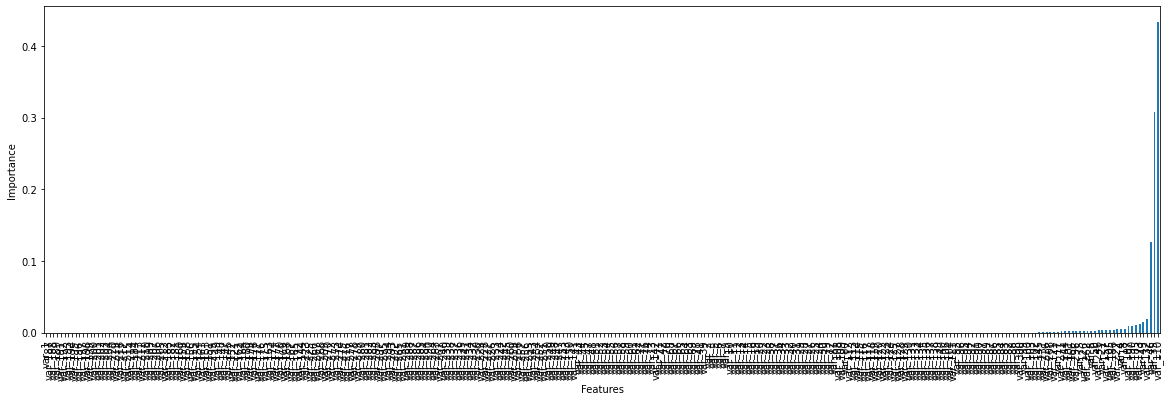

In [ ]:
features = pd.Series(model_full.feature_importances_)
features.index = X_train.columns

features.sort_values(ascending=True, inplace=True)

# plot
features.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
features = list(features.index)
features

['var_1',
 'var_187',
 'var_188',
 'var_189',
 'var_191',
 'var_192',
 'var_193',
 'var_194',
 'var_195',
 'var_196',
 'var_197',
 'var_198',
 'var_199',
 'var_200',
 'var_201',
 'var_202',
 'var_203',
 'var_204',
 'var_220',
 'var_219',
 'var_218',
 'var_217',
 'var_215',
 'var_214',
 'var_184',
 'var_213',
 'var_211',
 'var_210',
 'var_209',
 'var_207',
 'var_206',
 'var_205',
 'var_212',
 'var_183',
 'var_182',
 'var_181',
 'var_160',
 'var_159',
 'var_158',
 'var_156',
 'var_155',
 'var_154',
 'var_161',
 'var_153',
 'var_151',
 'var_299',
 'var_149',
 'var_148',
 'var_147',
 'var_146',
 'var_152',
 'var_221',
 'var_162',
 'var_164',
 'var_180',
 'var_179',
 'var_178',
 'var_177',
 'var_176',
 'var_175',
 'var_163',
 'var_174',
 'var_171',
 'var_170',
 'var_169',
 'var_168',
 'var_167',
 'var_165',
 'var_172',
 'var_144',
 'var_223',
 'var_225',
 'var_266',
 'var_267',
 'var_268',
 'var_269',
 'var_270',
 'var_272',
 'var_273',
 'var_274',
 'var_275',
 'var_276',
 'var_277',
 'var_

In [ ]:
# fijamos una tolerancia
tol = 0.0005

print('doing recursive feature elimination')

# iniciamos una lista donde guardaremos los features a eliminar
features_to_remove = []

count = 1

for feature in features:
    
    print()
    print('testing feature: ', feature, count, ' out of ', len(features))
    count = count + 1

    # inicializamos el modelo
    model_int = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)

    # entrenamos el modelo con todos los features menos el feature a evaluar
    # tmb iremos dropeando los features que vayamos removiendo
    model_int.fit(
        X_train.drop(features_to_remove + [feature], axis=1), y_train)

    y_pred_test = model_int.predict_proba(
        X_test.drop(features_to_remove + [feature], axis=1))[:, 1]

    # calculamos el roc-auc
    roc_int = roc_auc_score(y_test, y_pred_test)
    print('New Test ROC AUC={}'.format((roc_int)))

    print('Full dataset ROC AUC={}'.format((roc_full)))

    diff_roc = roc_full - roc_int

    # compramos roc-auc con la tolerancia
    if diff_roc >= tol:
        print('Drop in ROC AUC={}'.format(diff_roc))
        print('keep: ', feature)
        print
    else:
        print('Drop in ROC AUC={}'.format(diff_roc))
        print('remove: ', feature)
        print

        roc_full = roc_int
        
        features_to_remove.append(feature)

print('DONE!!')
print('total features to remove: ', len(features_to_remove))


features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))



doing recursive feature elimination

testing feature:  var_1 1  out of  300
New Test ROC AUC=0.827529410434876
Full dataset ROC AUC=0.8275069163621772
Drop in ROC AUC=-2.249407269883097e-05
remove:  var_1

testing feature:  var_187 2  out of  300
New Test ROC AUC=0.8275681816255076
Full dataset ROC AUC=0.827529410434876
Drop in ROC AUC=-3.8771190631559094e-05
remove:  var_187

testing feature:  var_188 3  out of  300
New Test ROC AUC=0.8274754924817237
Full dataset ROC AUC=0.8275681816255076
Drop in ROC AUC=9.268914378390836e-05
remove:  var_188

testing feature:  var_189 4  out of  300
New Test ROC AUC=0.827531105967994
Full dataset ROC AUC=0.8274754924817237
Drop in ROC AUC=-5.5613486270256196e-05
remove:  var_189

testing feature:  var_191 5  out of  300
New Test ROC AUC=0.8274839701473136
Full dataset ROC AUC=0.827531105967994
Drop in ROC AUC=4.713582068038846e-05
remove:  var_191

testing feature:  var_192 6  out of  300
New Test ROC AUC=0.8275069163621772
Full dataset ROC AUC=0.8

In [ ]:
model_final = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)

# fit the model with the selected features
model_final.fit(X_train[features_to_keep], y_train)

# make predictions
y_pred_test = model_final.predict_proba(X_test[features_to_keep])[:, 1]

# calculate roc-auc
roc_final = roc_auc_score(y_test, y_pred_test)
print('Test selected features ROC AUC=%f' % (roc_final))

Test selected features ROC AUC=0.829718
